<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/TopicModelling/BaseWorkshop/Topic_Modeling_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modeling Workshop Steps:**

- LDA modeling in Python using the Gensim implementation
- Not original work, Get more info in the following README.md
  - https://github.com/prodramp/DeepWorks/tree/main/TopicModelling/BaseWorkshop

Latent Dirichlet Allocation (LDA):

- LDA states that each document in a corpus is a combination of a fixed number of topics. 
- A topic has a probability of generating various words, where the words are all the observed words in the corpus. 
- These ‘hidden’ topics are then surfaced based on the likelihood of word co-occurrence

## **Use Cases:**
- Getting the gist of a super large text content
- Uncovering the hidden context or structure of a collection of text 
- User can get an idea about what the given super large collection of text is

## **Steps:**
1. Reading and Loading Data
   - NIPS Papers as our source dataset
2. Data Preparation
   - Select required columns
   - Remove Punctuations marks
3. Exploratory Data Analysis
   - Word Cloud
   - Document Term Matrix
4. Data Modeling and tokenization 
   - Stop words removal
   - bigram and trigram
   - Vectorization and Tokenization
5. Model Building
   - LDA Modelling
6. Model Evaluations
   - Model Visualization
   - Coherance Score

## **Dataset used in this workshop**
- NIPS papers
  - https://www.kaggle.com/datasets/benhamner/nips-papers

In [1]:
import pandas as pd

In [2]:
!ls /content/drive/MyDrive/devdata/nips-papers/papers.csv

/content/drive/MyDrive/devdata/nips-papers/papers.csv


In [3]:
papers_location = '/content/drive/MyDrive/devdata/nips-papers/papers.csv'

In [4]:
papers = pd.read_csv(papers_location)

In [6]:
papers.sample(10)

,id,year,title,event_type,pdf_name,abstract,paper_text
6570,6943,2017,Certified Defenses for Data Poisoning Attacks,Poster,6943-certified-defenses-for-data-poisoning-att...,Machine learning systems trained on user-provi...,Certified Defenses for Data Poisoning Attacks\...
2099,2906,2005,Correlated Topic Models,NaN,2906-correlated-topic-models.pdf,Abstract Missing,Correlated Topic Models\n\nDavid M. Blei\nDepa...
6533,691,1992,Intersecting regions: The Key to combinatorial...,NaN,691-intersecting-regions-the-key-to-combinator...,Abstract Missing,Intersecting regions: The key to combinatorial...
1119,2020,2001,On Discriminative vs. Generative Classifiers: ...,NaN,2020-on-discriminative-vs-generative-classifie...,Abstract Missing,On Discriminative vs. Generative\nclassifiers:...
6357,6750,2017,Learning Affinity via Spatial Propagation Netw...,Poster,6750-learning-affinity-via-spatial-propagation...,"In this paper, we propose a spatial propagatio...",Learning Affinity via Spatial Propagation Netw...
5657,6119,2016,Maximizing Influence in an Ising Network: A Me...,Poster,6119-maximizing-influence-in-an-ising-network-...,Influence maximization in social networks has ...,Maximizing Influence in an Ising Network:\nA M...
2506,3273,2007,An in-silico Neural Model of Dynamic Routing t...,NaN,3273-an-in-silico-neural-model-of-dynamic-rout...,Abstract Missing,An in-silico Neural Model of Dynamic Routing\n...
5791,624,1992,Analogy-- Watershed or Waterloo? Structural al...,NaN,624-analogy-watershed-or-waterloo-structural-a...,Abstract Missing,Analogy--Watershed or Waterloo?\nStructural al...
3949,4575,2012,Selective Labeling via Error Bound Minimization,NaN,4575-selective-labeling-via-error-bound-minimi...,"In many practical machine learning problems, t...",Selective Labeling via Error Bound Minimizatio...
2794,3533,2008,A ``Shape Aware'' Model for semi-supervised Le...,NaN,3533-a-shape-aware-model-for-semi-supervised-l...,Integrating semantic and syntactic analysis is...,A ?Shape Aware? Model for semi-supervised\nLea...


In [ ]:
papers.columns

Two options to select the target data:
1. Create a new dataframe using the selected columns
2. Drop the not necessary or unrequired columns from the dataframe

In [7]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1)

In [8]:
papers

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
...,...,...,...,...
7236,1994,Single Transistor Learning Synapses,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,1994,"Bias, Variance and the Combination of Least Sq...",Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,1994,A Real Time Clustering CMOS Neural Engine,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,1994,Learning direction in global motion: two class...,Abstract Missing,Learning direction in global motion: two\nclas...


# **Suggestion:**
- If your machine has low resources you can randomly Select N documents 
- N = 1000
- papers.sample(N) 

In [9]:
papers = papers.sample(100)

In [13]:
papers.sample(10)

,year,title,abstract,paper_text
6632,1987,On the Power of Neural Networks for Solving Ha...,Abstract Missing,137\n\nOn the Power of Neural Networks for\nSo...
3726,2011,On the Completeness of First-Order Knowledge C...,Probabilistic logics are receiving a lot of at...,On the Completeness of First-Order Knowledge\n...
1719,2004,Edge of Chaos Computation in Mixed-Mode VLSI -...,Abstract Missing,Edge of Chaos Computation in\nMixed-Mode VLSI ...
1722,2004,Instance-Specific Bayesian Model Averaging for...,Abstract Missing,Instance-Specific Bayesian Model\nAveraging f ...
3919,2012,A Simple and Practical Algorithm for Different...,We present a new algorithm for differentially ...,A Simple and Practical Algorithm\nfor Differen...
2861,2008,Support Vector Machines with a Reject Option,We consider the problem of binary classificati...,Support Vector Machines with a Reject Option\n...
3050,2009,fMRI-Based Inter-Subject Cortical Alignment Us...,The inter-subject alignment of functional MRI ...,fMRI-Based Inter-Subject Cortical Alignment Us...
1294,2002,Mismatch String Kernels for SVM Protein Classi...,Abstract Missing,Mismatch String Kernels for SVM Protein\nClass...
246,1996,Learning Appearance Based Models: Mixtures of ...,Abstract Missing,Learning Appearance Based Models:\nMixtures of...
3274,2010,Stability Approach to Regularization Selection...,A challenging problem in estimating high-dimen...,Stability Approach to Regularization Selection...


# **2. Data Preperation :**
## 2.1. Removing punctuations ## 
Cleaning original paper content by removing any punctuations as they are not needed for analysis and just adding weight to cause unnecessary processing.

In [14]:
import re

In [15]:
papers['clean_text'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [16]:
papers['clean_text']

2462    Fitted Q-iteration in continuous action-space ...
4500    Efficient Online Inference for Bayesian\nNonpa...
5761    Diffusion-Convolutional Neural Networks\nJames...
2914    Hierarchical Mixture of Classification Experts...
1008    FaceSync: A linear operator for measuring\nsyn...
                              ...                        
2601    C O F I R ANK\nMaximum Margin Matrix Factoriza...
1691    Auction Mechanism Design for Multi-Robot\nCoor...
1374    Mean-Field Approach to a Probabilistic Model\n...
3626    t-divergence Based Approximate Inference\nNan ...
6632    137\n\nOn the Power of Neural Networks for\nSo...
Name: clean_text, Length: 100, dtype: object

## **2.2. Removing Digits and all words with digits into it**


In [17]:
papers['clean_text'] = papers['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

# **2.3. Lowercase all text:**
- lowering the case will create a homogeneous text content for processing

In [19]:
papers['clean_text'] = papers['clean_text'].map(lambda x: x.lower())

In [22]:
papers['clean_text'].sample(10)

2428    psvm: parallelizing support vector machines\no...
6269    safe and nested subgame solving for\nimperfect...
259     blind separation of delayed and convolved\nsou...
2068    dynamic social network analysis using latent\n...
4759    graph clustering with missing data : convex\na...
3626    t-divergence based approximate inference\nnan ...
2544    colored maximum variance unfolding\n\nle song ...
6367    destabilization and route to chaos\nin neural ...
899     a support vector method for clustering\n\nasab...
6326    fixed-rank approximation of a\npositive-semide...
Name: clean_text, dtype: object

# **3. Exploratory Data (Text) analysis:**
- Word Cloud
- Document Term Matrix

## **3.1. Creating the word cloud (EDA)**

In [23]:
from wordcloud import WordCloud
def create_word_cloud(target_df, column_name):
  print('Joining all words into long text....')
  full_text = ','.join(list(target_df[column_name].values))
  wordcloud = WordCloud(background_color="black", 
                        max_words=100,  # top 100 words in the
                        contour_width=2, 
                        contour_color='yellow')
  print('Creating word cloud')
  wordcloud.generate(full_text)
  return wordcloud

Joining all words into long text....
Creating word cloud


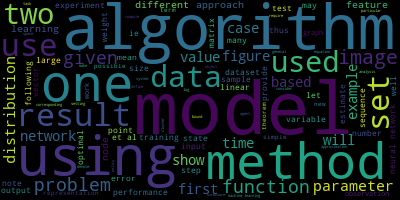

In [24]:
# For 7240 records the text will be quite a large so this step may take some time to complete.
wordcloud = create_word_cloud(papers, 'clean_text')
wordcloud.to_image() 

## **3.2. Document Term Matrix**

- I am going to San Francisco.
- I am not happy today.


In [25]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
def create_document_term_matrix(dataframe, column_name):
  cv = CountVectorizer(analyzer='word')
  data = cv.fit_transform(dataframe[column_name])
  df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
  df_dtm.index=dataframe.index
  return df_dtm

In [26]:
df_dtm = create_document_term_matrix(papers, 'clean_text')

In [30]:
df_dtm.sample(10)

,__,___,____,______,_______,____c_,_e,_i,_in,_izm,...,ztijk,ztlxd,ztlxt,zu,zuowei,zurich,zv,zx,zy,zz
3726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **4. Data Modeling and Tokenization**

## **4.1. Removing stop words and Lemmatization**

**Remove Stopwords**
- Text Classification
  - Spam Filtering
  - Language Classification
  - Genre Classification
- Caption Generation
- Auto-Tag Generation
- Topic Modeling
 
**Avoid Stopword Removal**
- Machine Translation
- Language Modeling
- Text Summarization
- Question-Answering problems

Source: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/

### 4.1.1 Using gensim NLTK library for removing stop words ###

In [31]:
import gensim
from gensim.utils import simple_preprocess
import nltk

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

In [34]:
stop_words = stopwords.words('english')
stop_words.extend(['has', 'been', 're', 'com', 'edu', 'use'])

In [35]:
# If you set deacc=True which will removes the punctuations
def convert_sentences_to_words(sentences):
    for sentence in sentences:        
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [36]:
def remove_all_stop_words(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [37]:
text_to_list = papers.clean_text.values.tolist()

In [38]:
len(text_to_list)
# all 7241 lines are sentenses now

100

In [39]:
text_to_list[0]

'fitted q-iteration in continuous action-space mdps\n\nandras antos\ncomputer and automation research inst\nof the hungarian academy of sciences\nkende u - budapest  hungary\nantos@sztakihu\n\nremi munos\nsequel project-team inria lille\n villeneuve dascq france\nremimunos@inriafr\n\ncsaba szepesvari\ndepartment of computing science\nuniversity of alberta\nedmonton   canada\nszepesva@csualbertaca\n\nabstract\nwe consider continuous state continuous action batch reinforcement learning\nwhere the goal is to learn a good policy from a sufficiently rich trajectory generated by some policy we study a variant of fitted q-iteration where the greedy\naction selection is replaced by searching for a policy in a restricted set of candidate policies by maximizing the average action values we provide a rigorous\nanalysis of this algorithm proving what we believe is the first finite-time bound\nfor value-function based algorithms for continuous state and action problems\n\n\n\npreliminaries\n\nwe wi

In [40]:
text_as_words = list(convert_sentences_to_words(text_to_list))

In [41]:
len(text_as_words)

100

In [43]:
print(text_as_words[0])

['fitted', 'iteration', 'in', 'continuous', 'action', 'space', 'mdps', 'andras', 'antos', 'computer', 'and', 'automation', 'research', 'inst', 'of', 'the', 'hungarian', 'academy', 'of', 'sciences', 'kende', 'budapest', 'hungary', 'antos', 'sztakihu', 'remi', 'munos', 'sequel', 'project', 'team', 'inria', 'lille', 'villeneuve', 'dascq', 'france', 'remimunos', 'inriafr', 'csaba', 'szepesvari', 'department', 'of', 'computing', 'science', 'university', 'of', 'alberta', 'edmonton', 'canada', 'szepesva', 'csualbertaca', 'abstract', 'we', 'consider', 'continuous', 'state', 'continuous', 'action', 'batch', 'reinforcement', 'learning', 'where', 'the', 'goal', 'is', 'to', 'learn', 'good', 'policy', 'from', 'sufficiently', 'rich', 'trajectory', 'generated', 'by', 'some', 'policy', 'we', 'study', 'variant', 'of', 'fitted', 'iteration', 'where', 'the', 'greedy', 'action', 'selection', 'is', 'replaced', 'by', 'searching', 'for', 'policy', 'in', 'restricted', 'set', 'of', 'candidate', 'policies', 'by

In [44]:
# remove stop words
clean_words = remove_all_stop_words(text_as_words)

In [45]:
len(clean_words)

100

In [46]:
len(clean_words[0])

2329

In [50]:
print(clean_words[:1][0][:20])

['fitted', 'iteration', 'continuous', 'action', 'space', 'mdps', 'andras', 'antos', 'computer', 'automation', 'research', 'inst', 'hungarian', 'academy', 'sciences', 'kende', 'budapest', 'hungary', 'antos', 'sztakihu']


### **4.2. Creating Bigram (2 words compound words) and Trigram (3 words compound words)**
- Bigram
  - google search
  - machine learning
  - artificial intelligence
- Trigram
  - on the table
  - natural language processing


In [51]:
# Note if you will use higher threshold, which will return the fewer phrases.
bigram = gensim.models.Phrases(clean_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[clean_words], threshold=100)  

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [53]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [54]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [55]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

### 2.1 Using Spacy library for removing stop words ###

In [56]:
# Importing spacy and Loading model
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [57]:
# Form Bigrams
clean_words_bigrams = make_bigrams(clean_words)

In [58]:
# Do lemmatization keeping only noun, adj, vb, adv
clean_words_lemmatized = lemmatization(clean_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [67]:
print(clean_words_lemmatized[:1][0][:100])

['continuous', 'action', 'space', 'andra', 'computer', 'hungarian', 'sztakihu', 'team', 'szepesva', 'consider', 'continuous', 'state', 'continuous', 'action', 'batch', 'reinforcement_learne', 'goal', 'learn', 'good', 'policy', 'sufficiently', 'rich', 'generate', 'policy', 'study', 'variant', 'greedy', 'action', 'selection', 'replace', 'search', 'policy', 'restrict', 'set', 'candidate', 'policy', 'maximize', 'average', 'action', 'value', 'provide', 'rigorous', 'analysis', 'algorithm', 'prove', 'believe', 'first', 'finite', 'time', 'bind', 'value', 'function', 'base', 'continuous', 'state', 'action', 'problem', 'preliminary', 'build', 'result', 'reason', 'notation', 'paper', 'unattributed', 'result', 'cite', 'section', 'find', 'book', 'discount', 'define', 'possible', 'infinite', 'state', 'space', 'set', 'action', 'transition', 'probability', 'kernel', 'define', 'next', 'state', 'distribution', 'take', 'action', 'state', 'give', 'correspond', 'distribution', 'immediate', 'reward', 'measu

## **4.2 Tokenizing the clean and lemmatize words**

In [68]:
print(len(clean_words))
print(len(clean_words[0]))
print(len(clean_words[99]))

100
2329
1120


In [59]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

100
1700
863


In [69]:
import gensim.corpora as corpora

In [71]:
id2word = corpora.Dictionary(clean_words_lemmatized)

# note: If you do not lematized the clean words you can still use the clean words as below
# id2word = corpora.Dictionary(clean_words)


# Creating Corpus for the clean words
texts = clean_words_lemmatized
#texts = clean_words


# Creating The Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [73]:
print(corpus[:1][0][:100])

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 35), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 10), (13, 1), (14, 9), (15, 1), (16, 1), (17, 1), (18, 8), (19, 2), (20, 1), (21, 2), (22, 4), (23, 4), (24, 3), (25, 8), (26, 4), (27, 6), (28, 1), (29, 2), (30, 3), (31, 1), (32, 2), (33, 16), (34, 29), (35, 1), (36, 1), (37, 3), (38, 1), (39, 1), (40, 2), (41, 13), (42, 1), (43, 3), (44, 6), (45, 1), (46, 1), (47, 3), (48, 5), (49, 3), (50, 3), (51, 5), (52, 2), (53, 11), (54, 1), (55, 2), (56, 7), (57, 3), (58, 7), (59, 1), (60, 2), (61, 14), (62, 1), (63, 1), (64, 1), (65, 4), (66, 7), (67, 1), (68, 2), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 2), (75, 2), (76, 2), (77, 1), (78, 1), (79, 1), (80, 5), (81, 2), (82, 1), (83, 3), (84, 2), (85, 2), (86, 2), (87, 2), (88, 7), (89, 1), (90, 6), (91, 1), (92, 1), (93, 1), (94, 9), (95, 11), (96, 1), (97, 1), (98, 2), (99, 1)]


In [74]:
print(len(clean_words_lemmatized))
print(len(clean_words_lemmatized[0]))
print(len(clean_words_lemmatized[99]))

100
1700
863


From now on the following objects will be used for modeling:
- id2word
- corpus

# **5. Training the LDA Model**

Latent Dirichlet Allocation (LDA):
- Unsupervised machine learning, clustering technique
- A topic modeling in which words are represented as topics, 
- Documents are represented as a collection of these word topics

In [82]:
# Definiting the total number of topics we are interested from the given tech corpus
num_topics = 10

- A LDA model with N (= num_topics) topics
- Each Topic is a combination of keywords
- Each keyword contribute certain weight to the topic

In [88]:
# Using Gensin to build the LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=id2word, 
                                       num_topics=num_topics,
                                       )

# Please perform the modelling by adding the following options also to check your modelling performance
# random_state=100,
# chunksize=100,
# passes=10,
# per_word_topics=True


In [89]:
# Print the Keyword in the N (=num_topics) topics
from pprint import pprint
pprint(lda_model.print_topics())
#pprint(lda_model.print_topics(N))

[(0,
  '0.020*"model" + 0.011*"use" + 0.008*"network" + 0.007*"time" + '
  '0.007*"learn" + 0.007*"function" + 0.006*"result" + 0.006*"set" + '
  '0.006*"image" + 0.006*"method"'),
 (1,
  '0.012*"model" + 0.010*"set" + 0.010*"use" + 0.007*"distribution" + '
  '0.007*"result" + 0.006*"function" + 0.006*"method" + 0.006*"network" + '
  '0.006*"policy" + 0.005*"problem"'),
 (2,
  '0.011*"use" + 0.009*"model" + 0.008*"result" + 0.007*"image" + '
  '0.007*"function" + 0.007*"network" + 0.007*"problem" + 0.006*"set" + '
  '0.005*"time" + 0.005*"distribution"'),
 (3,
  '0.013*"model" + 0.011*"use" + 0.007*"distribution" + 0.006*"result" + '
  '0.005*"set" + 0.005*"time" + 0.005*"show" + 0.005*"network" + '
  '0.005*"method" + 0.005*"learn"'),
 (4,
  '0.011*"model" + 0.008*"use" + 0.007*"state" + 0.006*"set" + 0.006*"show" + '
  '0.006*"learn" + 0.006*"distribution" + 0.006*"algorithm" + 0.006*"result" + '
  '0.005*"function"'),
 (5,
  '0.012*"model" + 0.012*"use" + 0.009*"function" + 0.008*"s

Understanding the above result:
- Above you are seeing N topics
- Each topic is a collection of M keywords
- Each keyword has the weight
- For every topic each keywords provide the importance based on the weight as shown 

In [90]:
doc_lda = lda_model[corpus]

In [92]:
doc_lda
# to Save the mode;
# doc_lda.save()

# **6. Analyzing the LDA Model**

- Understanding and interpreting individual topics
- Understanding the relationships between the topics.

In [93]:
!pip install pyLDAvis

In [94]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [95]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [96]:
LDAvis_data_filepath = os.path.join('/content/results/ldavis_prepared_'+str(num_topics))

In [97]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [98]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [99]:
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

In [100]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.001470  0.009057       1        1  29.665970
8     -0.006502 -0.002360       2        1  13.915657
0      0.011305 -0.000207       3        1  13.849841
7      0.005493 -0.011711       4        1   8.558589
2      0.003825 -0.002794       5        1   7.393522
6      0.001923 -0.005090       6        1   7.150309
9     -0.000333  0.002765       7        1   5.729087
4     -0.020490 -0.000903       8        1   5.039800
3      0.005569  0.008471       9        1   4.477995
1     -0.002261  0.002772      10        1   4.219230, topic_info=           Term         Freq        Total Category  logprob  loglift
834       model  2239.000000  2239.000000  Default  30.0000  30.0000
534         use  1856.000000  1856.000000  Default  29.0000  29.0000
1193      image   848.000000   848.000000  Default  28.0000  28.0000
426      result  1040.000000  1040.000000  Default  27.0000  27.0000
448         set  1231.000000  1231.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
109       datum    30.873891   905.234742  Topic10  -5.4734  -0.2128
212        give    28.451700   806.814283  Topic10  -5.5551  -0.1794
12    algorithm    23.944387   567.979847  Topic10  -5.7276  -0.0008
14         also    23.458271   597.450527  Topic10  -5.7481  -0.0719
732     feature    23.203286   584.068865  Topic10  -5.7590  -0.0602

[864 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5621      1  0.475504  abstraction
5621      2  0.103371  abstraction
5621      3  0.062022  abstraction
5621      4  0.041348  abstraction
5621      5  0.062022  abstraction
...     ...       ...          ...
8048      5  0.122470         worm
8048      6  0.244939         worm
7033      2  0.236061       ystrom
7033      3  0.236061       ystrom
7033      6  0.236061       ystrom

[3305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 1, 8, 3, 7, 10, 5, 4, 2])

# **Calculating Coherence Score:**
- Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.

- It calculates how often two words, and appear together in the corpus
- Higher the keywords you will have in your topic the lower the coherence will be
- Lower the keywords you will have the coherence could be higher

In [101]:
from gensim.models import CoherenceModel

In [102]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_words_lemmatized, dictionary=id2word, coherence='c_v')
# Note: If you have used only clean_words instead of clean_words_lemmatized then use proper words corpus above.

In [103]:
coherence_lda = coherence_model_lda.get_coherence()

In [104]:
print('LDA Model Coherence Score: ', coherence_lda)

LDA Model Coherence Score:  0.23779943167776732
